In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.cluster import hierarchy
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv('df.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON,BOND_10Y,Dollar_Index
0,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,8314.0,247.25,5.77,116.25,50.73,6.485,100.410004
1,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,8307.0,249.75,5.81,118.60,51.56,6.599,100.379997
2,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,8252.0,248.50,5.77,116.85,52.08,6.549,100.650002
3,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,8174.0,251.75,5.84,114.15,53.96,6.504,100.800003
4,2000-01-10,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,8130.0,253.50,5.83,117.55,53.56,6.558,100.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,2023-07-27,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,21519.0,712.75,24.43,161.45,86.62,4.012,101.769997
5880,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,22127.0,665.75,24.11,164.65,85.44,3.959,101.860001
5881,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,22189.0,652.25,24.39,164.55,86.87,4.051,102.300003
5882,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,21379.0,640.00,24.20,166.95,85.08,4.078,102.589996


We have to find % change for better performance

In [3]:
# Convert columns to numeric (ignore errors for non-numeric values)
df = df.apply(pd.to_numeric, errors='coerce')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON,BOND_10Y,Dollar_Index
0,NaN,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,8314.0,247.25,5.77,116.25,50.73,6.485,100.410004
1,NaN,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,8307.0,249.75,5.81,118.60,51.56,6.599,100.379997
2,NaN,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,8252.0,248.50,5.77,116.85,52.08,6.549,100.650002
3,NaN,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,8174.0,251.75,5.84,114.15,53.96,6.504,100.800003
4,NaN,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,8130.0,253.50,5.83,117.55,53.56,6.558,100.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,NaN,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,21519.0,712.75,24.43,161.45,86.62,4.012,101.769997
5880,NaN,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,22127.0,665.75,24.11,164.65,85.44,3.959,101.860001
5881,NaN,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,22189.0,652.25,24.39,164.55,86.87,4.051,102.300003
5882,NaN,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,21379.0,640.00,24.20,166.95,85.08,4.078,102.589996


In [4]:
# Calculate percent change for all columns and create new columns
for column in df.columns:
    df[column + '_Percent_Change'] = ((df[column] - df[column].shift(1)) / df[column].shift(1)) * 100
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,...,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
0,NaN,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,...,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,NaN,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,...,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,NaN,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,...,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,NaN,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,...,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,NaN,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,...,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,NaN,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,...,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,NaN,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,...,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,NaN,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,...,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [5]:
df.isnull().sum()

Date                           5884
NATURAL GAS                       0
GOLD                              0
WTI CRUDE                         0
BRENT CRUDE                       0
SOYBEANS                          0
CORN                              0
COPPER                            0
ALUMINIUM                         0
ZINC                              0
NICKEL                            0
WHEAT                             0
SUGAR                             0
COFFEE                            0
COTTON                            0
BOND_10Y                          0
Dollar_Index                      0
Date_Percent_Change            5884
NATURAL GAS_Percent_Change        1
GOLD_Percent_Change               1
WTI CRUDE_Percent_Change          1
BRENT CRUDE_Percent_Change        1
SOYBEANS_Percent_Change           1
CORN_Percent_Change               1
COPPER_Percent_Change             1
ALUMINIUM_Percent_Change          1
ZINC_Percent_Change               1
NICKEL_Percent_Change       

In [6]:
df = df .drop(columns= ['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS',
       'CORN', 'COPPER', 'ALUMINIUM', 'ZINC', 'NICKEL', 'WHEAT', 'SUGAR',
       'COFFEE', 'COTTON', 'BOND_10Y',
       'Dollar_Index','Date','Date_Percent_Change'])
df

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,-6.491557,-1.238516,1.662859,1.591896,-0.921584,-1.295696,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [7]:
df = df.dropna()
df

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,-6.491557,-1.238516,1.662859,1.591896,-0.921584,-1.295696,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [8]:
df.columns

Index(['NATURAL GAS_Percent_Change', 'GOLD_Percent_Change',
       'WTI CRUDE_Percent_Change', 'BRENT CRUDE_Percent_Change',
       'SOYBEANS_Percent_Change', 'CORN_Percent_Change',
       'COPPER_Percent_Change', 'ALUMINIUM_Percent_Change',
       'ZINC_Percent_Change', 'NICKEL_Percent_Change', 'WHEAT_Percent_Change',
       'SUGAR_Percent_Change', 'COFFEE_Percent_Change',
       'COTTON_Percent_Change', 'BOND_10Y_Percent_Change',
       'Dollar_Index_Percent_Change'],
      dtype='object')

Cheaking for Outliers

In [9]:
df1  =pd.DataFrame()

1. by using visual representation

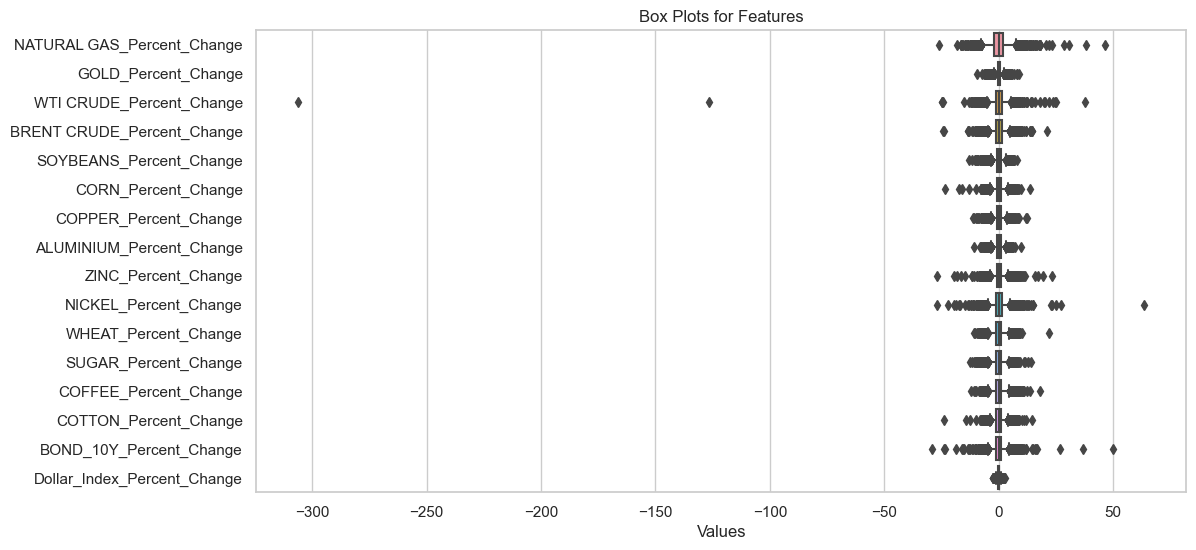

In [10]:
#Box plot

# Assuming 'your_data' is a DataFrame with your dataset
sns.set(style="whitegrid")  # Set the plot style

# Create box plots for each feature
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df, orient="h")  # Horizontal box plots
plt.title("Box Plots for Features")
plt.xlabel("Values")
plt.show()

In [11]:
# Isolation Forestt
isolation_forest = IsolationForest()
isolation_forest_labels = isolation_forest.fit_predict(df)
isolation_forest_outliers = np.where(isolation_forest_labels == -1)[0]
len(isolation_forest_outliers)

197

In [12]:
from scipy import stats
z_scores = stats.zscore(df)
threshold = 3  # You can adjust this threshold as needed
z_score_outliers = np.where(np.abs(z_scores) > threshold)[0]
len(z_score_outliers)


1141

In [13]:
# Calculate IQR
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = np.where((df < lower_bound) | (df > upper_bound))[0]
len(iqr_outliers)

5918

In [14]:
outliers = set(z_score_outliers) & set(isolation_forest_outliers) & set(iqr_outliers)
len(outliers)

180

In [15]:
df1 = df.drop(outliers)
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [16]:
df1.describe()

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,0.094199,0.046204,0.086819,0.070334,0.042681,0.042967,0.052158,0.025728,0.045548,0.047220,0.050172,0.050288,0.034709,0.036514,0.034803,-0.001779
std,3.675730,1.073732,2.540301,2.231916,1.534611,1.772772,1.620945,1.392462,1.974528,2.438885,2.006568,2.061077,2.135555,1.891522,2.310599,0.487020
min,-25.953711,-9.353764,-24.557261,-13.443396,-12.927536,-23.556664,-11.049724,-7.970461,-27.158596,-22.356495,-10.483535,-12.690355,-12.055780,-23.884977,-18.550109,-2.488265
25%,-1.888582,-0.467585,-1.227178,-1.098999,-0.753372,-0.924609,-0.804577,-0.781000,-0.917895,-1.158079,-1.193969,-1.121795,-1.218981,-0.943884,-1.130052,-0.280129
50%,0.000000,0.040548,0.123343,0.107933,0.083459,0.000000,0.033289,0.000000,0.000000,0.000000,-0.038775,0.000000,0.000000,0.000000,-0.061928,0.000000
75%,1.886849,0.610006,1.380510,1.250945,0.882947,0.977915,0.921037,0.799077,1.015770,1.272990,1.172901,1.191667,1.161917,0.984958,1.081654,0.277679
max,46.481178,9.007850,37.662338,21.018593,7.927786,13.606557,9.077491,9.753136,23.355610,27.349159,21.776098,13.953488,18.094273,14.593207,49.899801,2.555823


In [17]:
# Convert columns to numeric, handling errors
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1[(df1 > -10) & (df1 < 10)]
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [18]:
df1.describe()

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
count,5592.000000,5703.000000,5675.000000,5691.000000,5699.000000,5699.000000,5701.000000,5703.000000,5690.000000,5676.000000,5701.000000,5696.000000,5691.000000,5695.000000,5683.000000,5703.000000
mean,0.010087,0.046204,0.064899,0.060157,0.050667,0.050581,0.055886,0.025728,0.040581,0.038473,0.048208,0.051901,0.021629,0.038843,0.023238,-0.001779
std,3.072990,1.073732,2.256045,2.149470,1.504962,1.707930,1.608934,1.392462,1.806040,2.181005,1.981275,2.020949,2.065996,1.816449,2.079168,0.487020
min,-9.949917,-9.353764,-9.461694,-9.899087,-9.963250,-9.885387,-9.458812,-7.970461,-9.379932,-9.950208,-8.810916,-9.996924,-8.625954,-8.096572,-9.908814,-2.488265
25%,-1.867545,-0.467585,-1.217937,-1.096394,-0.751723,-0.923894,-0.804241,-0.781000,-0.916586,-1.154189,-1.191766,-1.119641,-1.218981,-0.941810,-1.127210,-0.280129
50%,0.000000,0.040548,0.122829,0.106933,0.084388,0.000000,0.034795,0.000000,0.000000,0.000000,-0.038775,0.000000,0.000000,0.000000,-0.062535,0.000000
75%,1.807146,0.610006,1.371836,1.246419,0.883392,0.977915,0.921234,0.799077,1.013679,1.261247,1.172893,1.191509,1.155340,0.983856,1.077572,0.277679
max,9.884640,9.007850,9.357704,9.636105,7.927786,9.607194,9.077491,9.753136,9.354203,9.192246,9.164733,9.247312,9.947090,9.063520,9.482765,2.555823


In [19]:
df1.isnull().sum()

NATURAL GAS_Percent_Change     111
GOLD_Percent_Change              0
WTI CRUDE_Percent_Change        28
BRENT CRUDE_Percent_Change      12
SOYBEANS_Percent_Change          4
CORN_Percent_Change              4
COPPER_Percent_Change            2
ALUMINIUM_Percent_Change         0
ZINC_Percent_Change             13
NICKEL_Percent_Change           27
WHEAT_Percent_Change             2
SUGAR_Percent_Change             7
COFFEE_Percent_Change           12
COTTON_Percent_Change            8
BOND_10Y_Percent_Change         20
Dollar_Index_Percent_Change      0
dtype: int64

In [20]:
df1 = df1.dropna()
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [21]:
df1.isnull().sum()

NATURAL GAS_Percent_Change     0
GOLD_Percent_Change            0
WTI CRUDE_Percent_Change       0
BRENT CRUDE_Percent_Change     0
SOYBEANS_Percent_Change        0
CORN_Percent_Change            0
COPPER_Percent_Change          0
ALUMINIUM_Percent_Change       0
ZINC_Percent_Change            0
NICKEL_Percent_Change          0
WHEAT_Percent_Change           0
SUGAR_Percent_Change           0
COFFEE_Percent_Change          0
COTTON_Percent_Change          0
BOND_10Y_Percent_Change        0
Dollar_Index_Percent_Change    0
dtype: int64

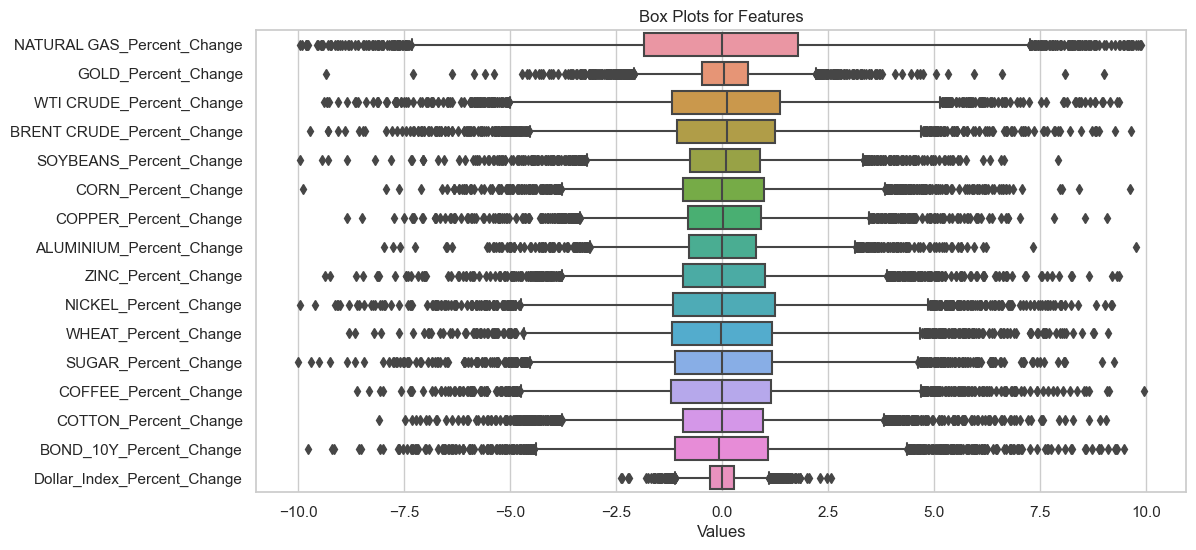

In [22]:
#Box plot

# Assuming 'your_data' is a DataFrame with your dataset
sns.set(style="whitegrid")  # Set the plot style

# Create box plots for each feature
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df1, orient="h")  # Horizontal box plots
plt.title("Box Plots for Features")
plt.xlabel("Values")
plt.show()

In [23]:
df1.columns

Index(['NATURAL GAS_Percent_Change', 'GOLD_Percent_Change',
       'WTI CRUDE_Percent_Change', 'BRENT CRUDE_Percent_Change',
       'SOYBEANS_Percent_Change', 'CORN_Percent_Change',
       'COPPER_Percent_Change', 'ALUMINIUM_Percent_Change',
       'ZINC_Percent_Change', 'NICKEL_Percent_Change', 'WHEAT_Percent_Change',
       'SUGAR_Percent_Change', 'COFFEE_Percent_Change',
       'COTTON_Percent_Change', 'BOND_10Y_Percent_Change',
       'Dollar_Index_Percent_Change'],
      dtype='object')

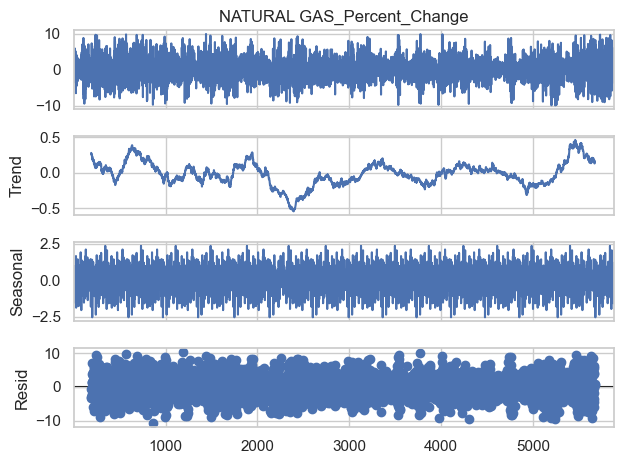

In [24]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['NATURAL GAS_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

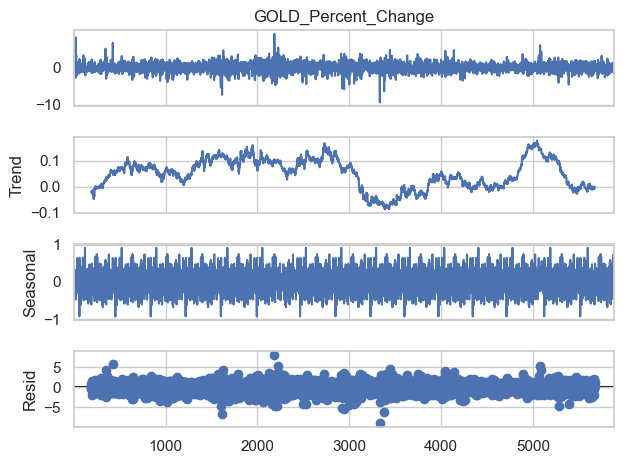

In [25]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['GOLD_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

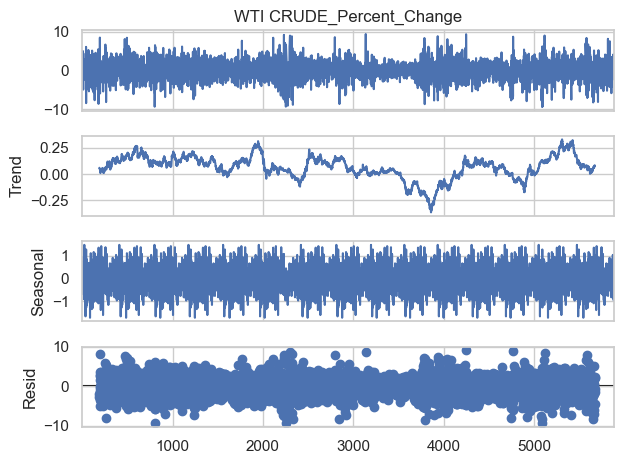

In [26]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['WTI CRUDE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

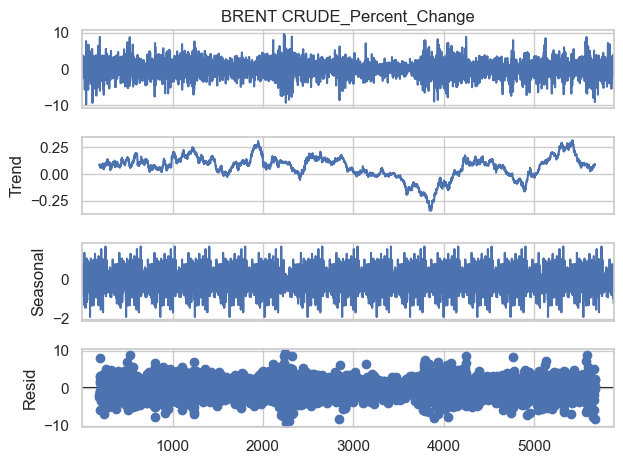

In [27]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['BRENT CRUDE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

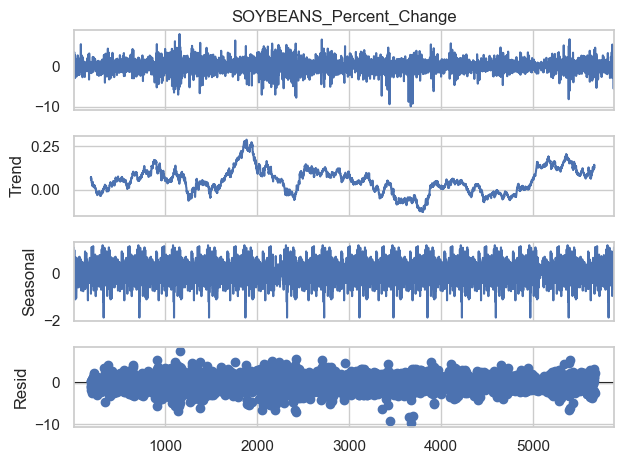

In [28]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['SOYBEANS_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

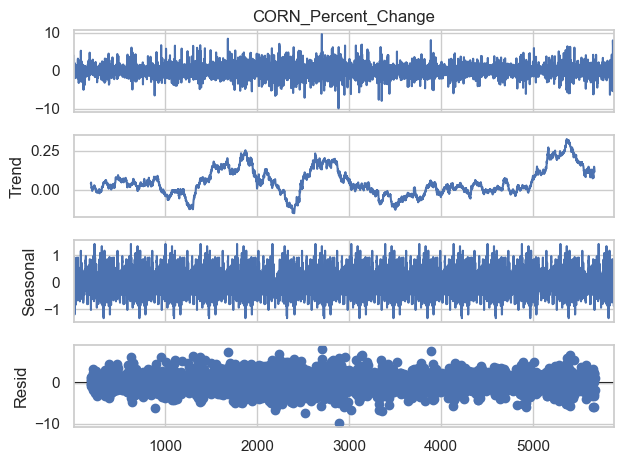

In [29]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['CORN_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

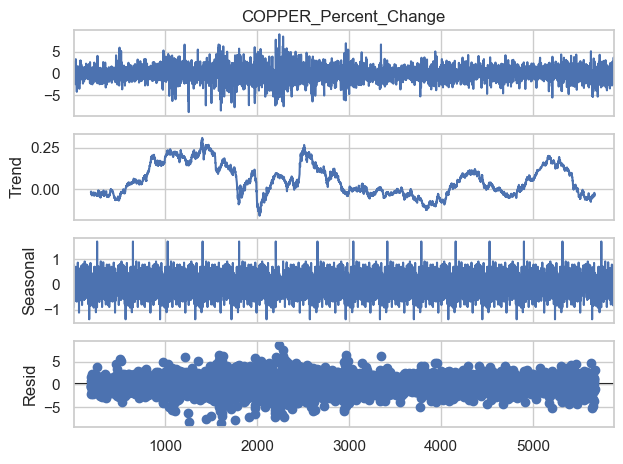

In [30]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COPPER_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

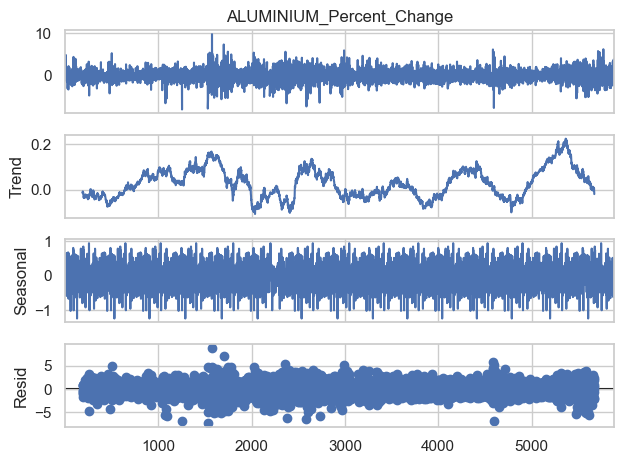

In [31]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['ALUMINIUM_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

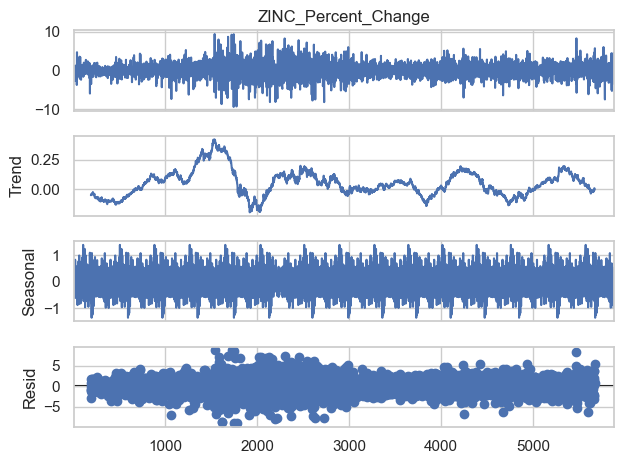

In [32]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['ZINC_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

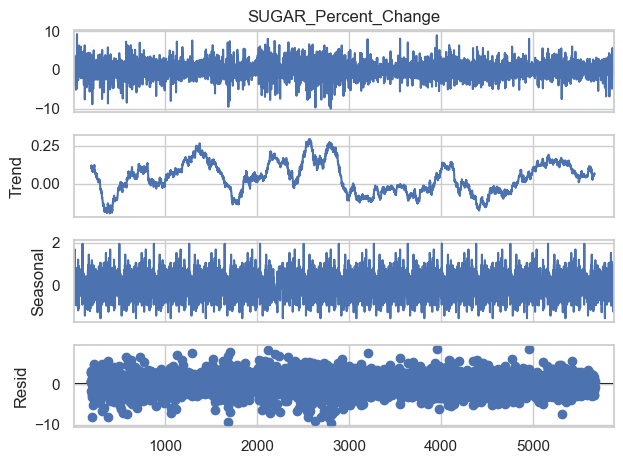

In [33]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['SUGAR_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

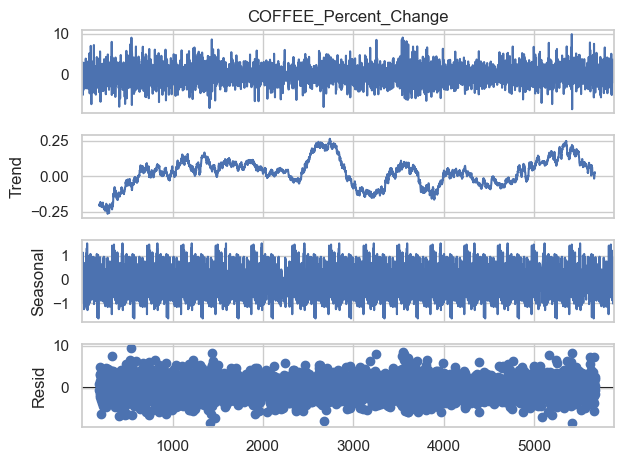

In [34]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COFFEE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

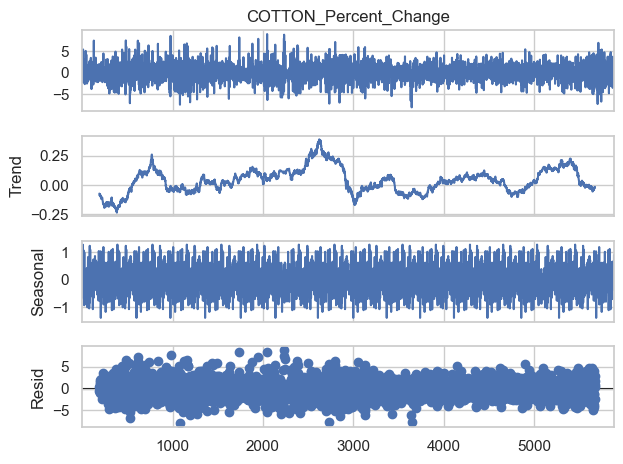

In [35]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COTTON_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

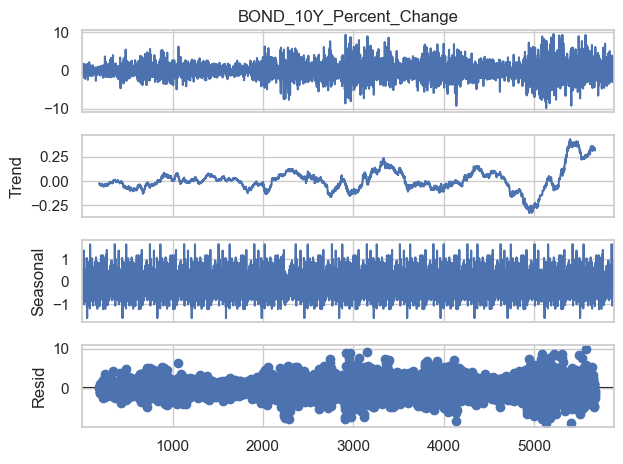

In [36]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['BOND_10Y_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

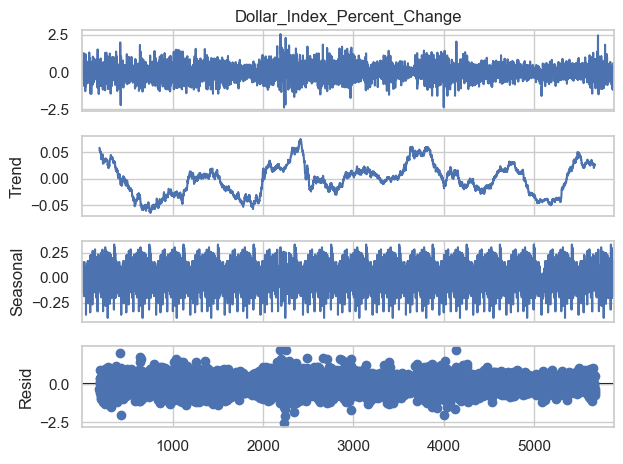

In [37]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['Dollar_Index_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

Correlation Matrix

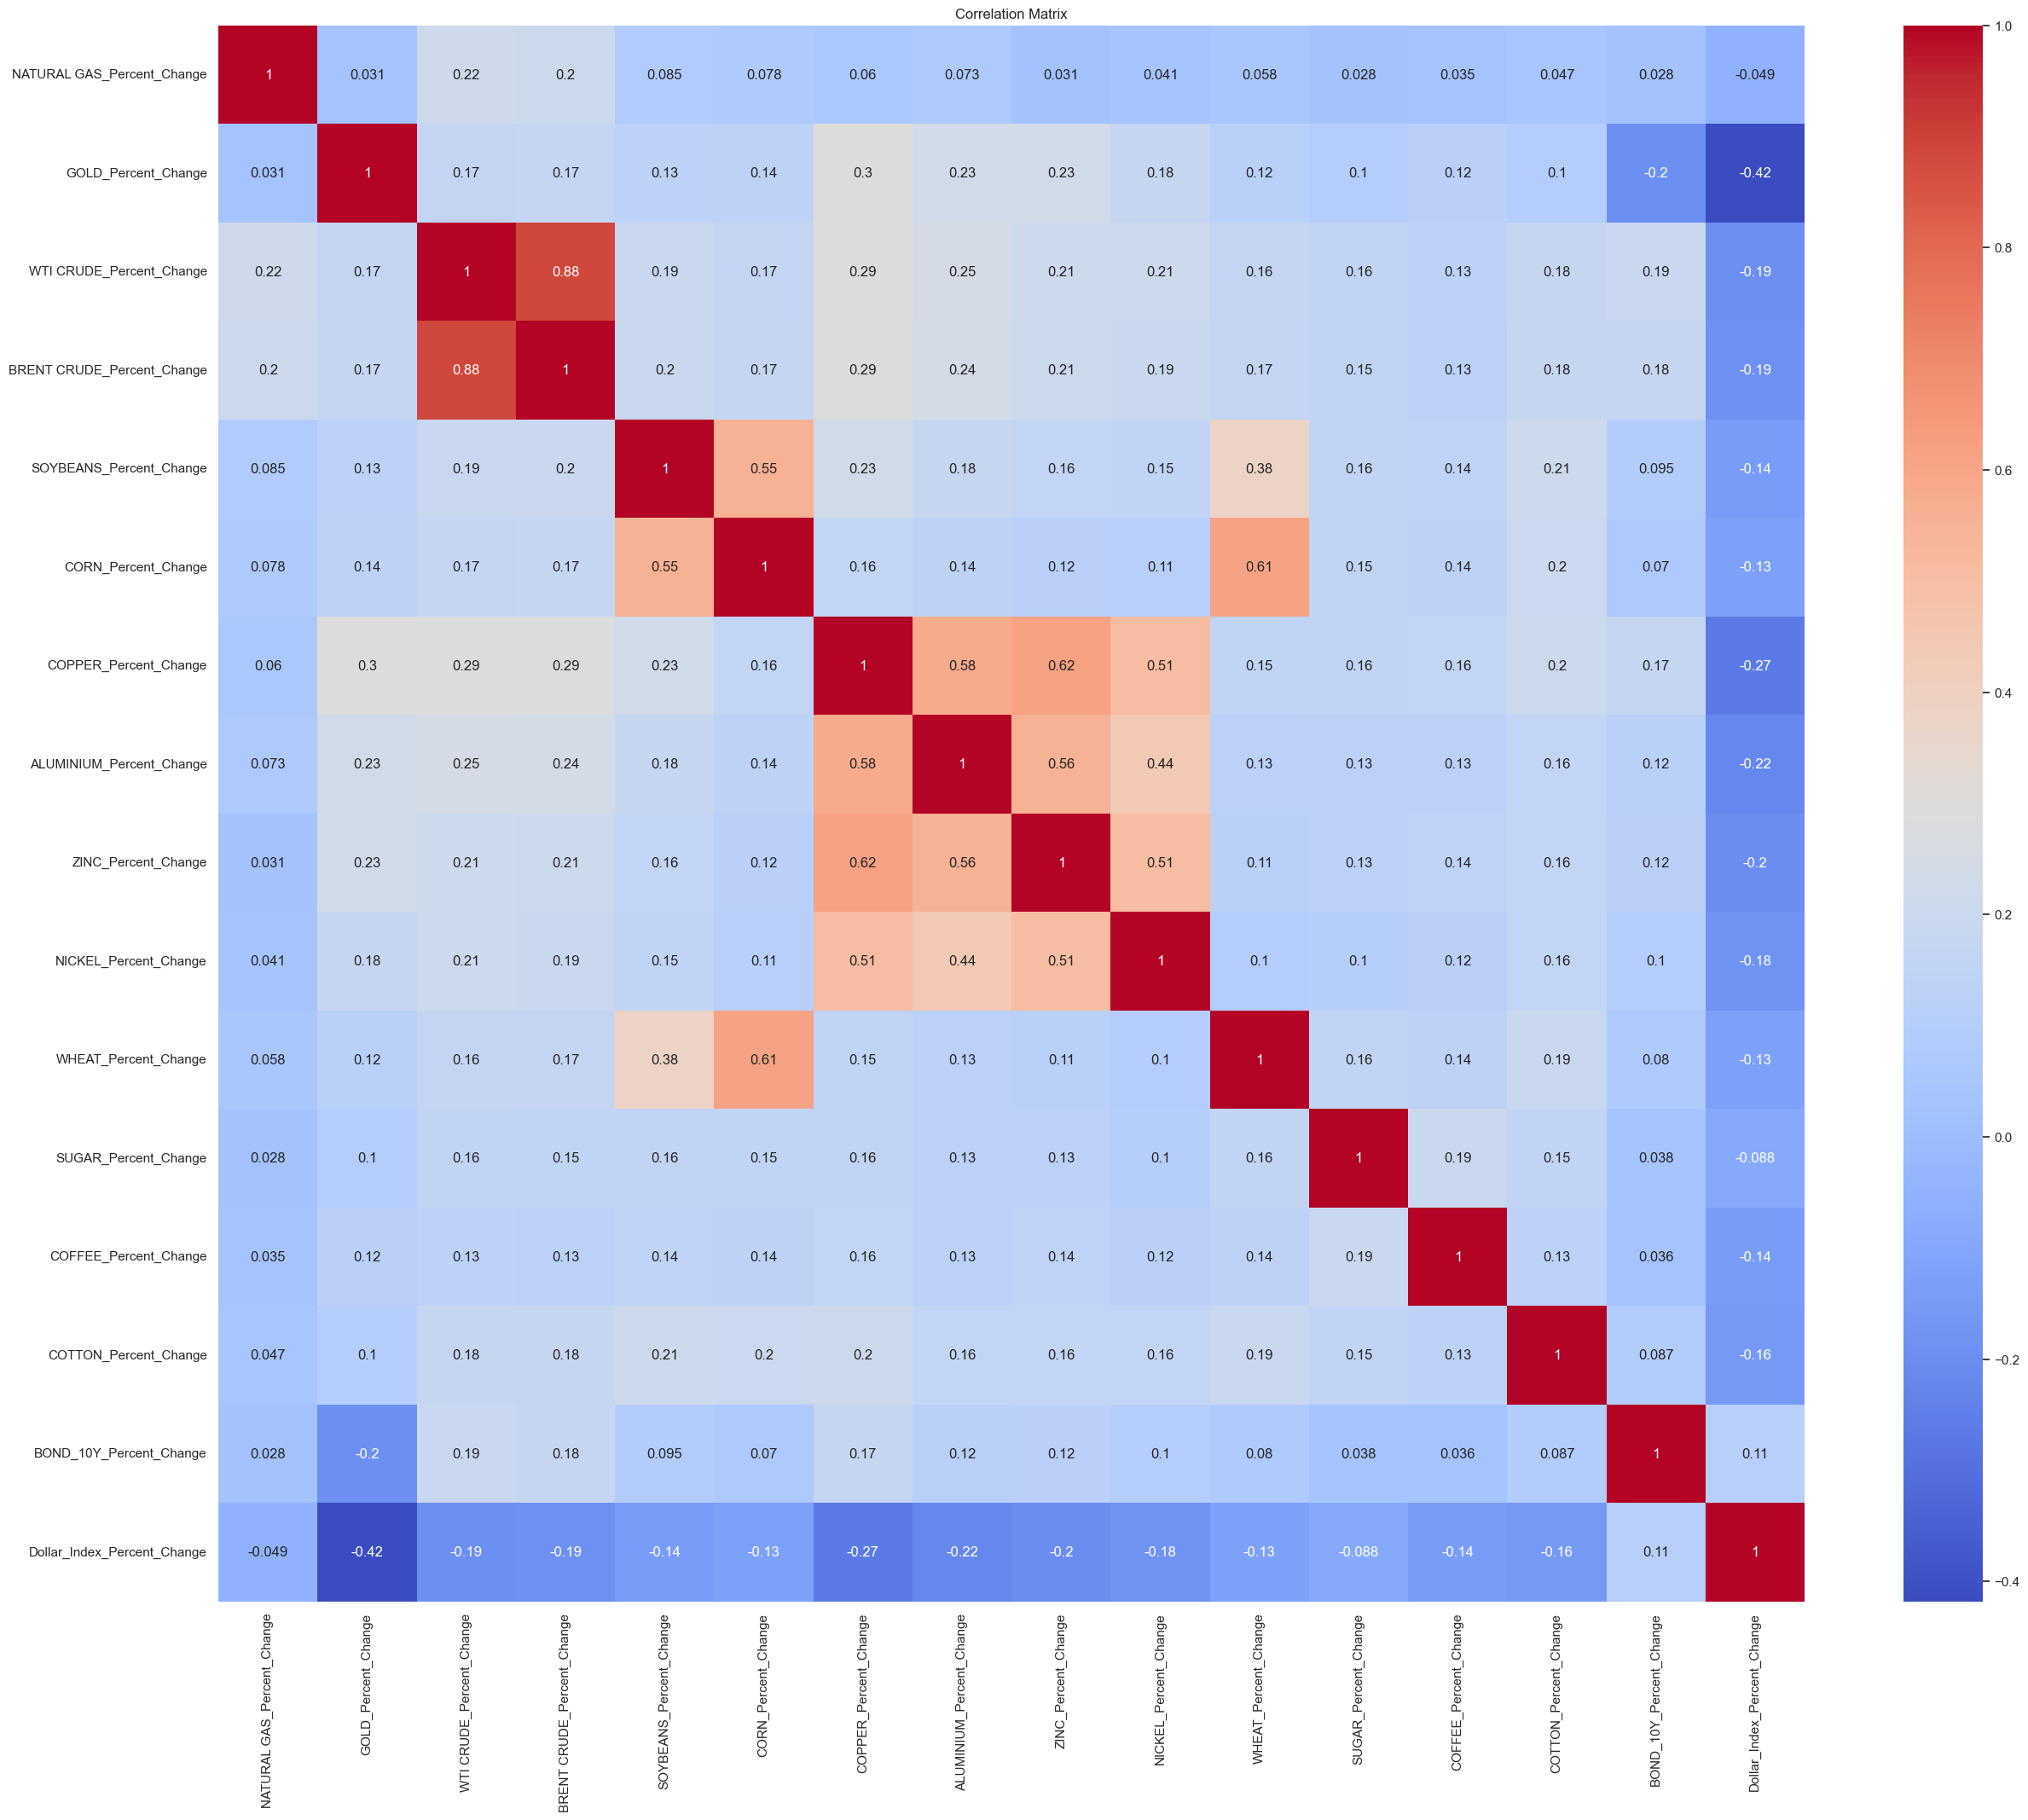

In [38]:
# Correlation matrix for data where outliers is there 
corr_matrix2 = df1.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

feature enginnering

In [39]:
# Define the number of lags and the window size for moving averages
num_lags = 3  
window_size = 7
# Iterate through the columns of the dataset
for col in df1.columns:
        for lag in range(1, num_lags + 1):
            df1[f'{col}_Lag{lag}'] = df1[col].shift(lag)
        
        # Moving Averages 7 day
        df1[f'{col}_MA{window_size}'] = df1[col].rolling(window=window_size).mean()
df1

C:\Users\Harsh\AppData\Local\Temp\ipykernel_3528\2582454639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f'{col}_Lag{lag}'] = df1[col].shift(lag)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3528\2582454639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f'{col}_Lag{lag}'] = df1[col].shift(lag)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3528\2582454639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,...,COTTON_Percent_Change_Lag3,COTTON_Percent_Change_MA7,BOND_10Y_Percent_Change_Lag1,BOND_10Y_Percent_Change_Lag2,BOND_10Y_Percent_Change_Lag3,BOND_10Y_Percent_Change_MA7,Dollar_Index_Percent_Change_Lag1,Dollar_Index_Percent_Change_Lag2,Dollar_Index_Percent_Change_Lag3,Dollar_Index_Percent_Change_MA7
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,...,NaN,NaN,1.757900,NaN,NaN,NaN,-0.029884,NaN,NaN,NaN
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,...,NaN,NaN,-0.757693,1.757900,NaN,NaN,0.268982,-0.029884,NaN,NaN
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,...,1.636113,NaN,-0.687122,-0.757693,1.757900,NaN,0.149033,0.268982,-0.029884,NaN
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,...,1.008534,NaN,0.830257,-0.687122,-0.757693,NaN,0.188487,0.149033,0.268982,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,...,0.362065,1.131861,1.425974,0.077842,2.993051,-0.157652,0.000000,0.465901,0.598323,0.043514
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,...,-0.407308,0.888772,-1.559301,1.425974,0.077842,0.023630,-0.453872,0.000000,0.465901,0.162737
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,...,3.470437,1.078249,-1.321036,-1.559301,1.425974,0.385703,0.088439,-0.453872,0.000000,0.210137
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,...,1.614907,0.470138,2.323819,-1.321036,-1.559301,0.658121,0.431968,0.088439,-0.453872,0.202033


In [40]:
df1.isnull().sum()

NATURAL GAS_Percent_Change          0
GOLD_Percent_Change                 0
WTI CRUDE_Percent_Change            0
BRENT CRUDE_Percent_Change          0
SOYBEANS_Percent_Change             0
                                   ..
BOND_10Y_Percent_Change_MA7         6
Dollar_Index_Percent_Change_Lag1    1
Dollar_Index_Percent_Change_Lag2    2
Dollar_Index_Percent_Change_Lag3    3
Dollar_Index_Percent_Change_MA7     6
Length: 80, dtype: int64

In [41]:
df1 = df1.dropna()
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,...,COTTON_Percent_Change_Lag3,COTTON_Percent_Change_MA7,BOND_10Y_Percent_Change_Lag1,BOND_10Y_Percent_Change_Lag2,BOND_10Y_Percent_Change_Lag3,BOND_10Y_Percent_Change_MA7,Dollar_Index_Percent_Change_Lag1,Dollar_Index_Percent_Change_Lag2,Dollar_Index_Percent_Change_Lag3,Dollar_Index_Percent_Change_MA7
7,0.356506,0.493479,1.560122,0.685208,1.957672,2.436195,-1.096998,-0.593246,-0.146352,-1.025516,...,-0.741290,1.105585,0.480193,1.616346,0.830257,0.296429,0.059671,-0.425785,0.188487,0.084023
8,3.108348,-0.070151,4.983140,1.961569,0.778412,-0.792752,0.700525,1.208875,0.146566,0.222030,...,1.157580,0.968397,-1.164876,0.480193,1.616346,0.166183,0.377656,0.059671,-0.425785,0.190131
9,2.627046,1.649702,2.962170,2.277189,3.450051,0.456621,0.405797,4.868461,0.000000,0.000000,...,-0.849022,0.731018,0.846173,-1.164876,0.480193,0.432822,0.712872,0.377656,0.059671,0.171367
10,1.426773,0.241713,2.391681,-0.806142,-0.248880,0.340909,1.905312,1.787774,0.961739,3.236923,...,1.917349,0.995355,1.108786,0.846173,-1.164876,0.482291,0.137632,0.712872,0.377656,0.136052
11,5.875052,-0.344471,0.406229,1.006192,0.898204,0.000000,-1.076487,-0.495751,-1.056119,-0.298045,...,0.675799,1.024569,-0.340845,1.108786,0.846173,0.412541,-0.098172,0.137632,0.712872,0.052970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,...,0.362065,1.131861,1.425974,0.077842,2.993051,-0.157652,0.000000,0.465901,0.598323,0.043514
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,...,-0.407308,0.888772,-1.559301,1.425974,0.077842,0.023630,-0.453872,0.000000,0.465901,0.162737
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,...,3.470437,1.078249,-1.321036,-1.559301,1.425974,0.385703,0.088439,-0.453872,0.000000,0.210137
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,...,1.614907,0.470138,2.323819,-1.321036,-1.559301,0.658121,0.431968,0.088439,-0.453872,0.202033


In [42]:
df1.to_csv('final_df.csv') 